<a href="https://colab.research.google.com/github/trupti1428/Student_score_porediction_based_on_study_hours_GRIP_Task1/blob/main/Student_score_porediction_based_on_study_hours_GRIP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Spark Foundation (GRIP) June 2022 Internship Project

# Data Science and Business Analytics

##Author - Trupti Mahadik

##Supervised Learning

###Project - Predict the percentage of the students bases on the number of study hours.

Importing Important Libraries to be used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading data from remote link

In [ ]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

In [ ]:
# Printing first 5 rows
student_data.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Printing last 5 rows
student_data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# Checking data shape
student_data.shape


(25, 2)

In [ ]:
# Checking data for null 
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Checking deviation in data
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Checking data correlation
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Vidsualizing the relation between hours and scores columns

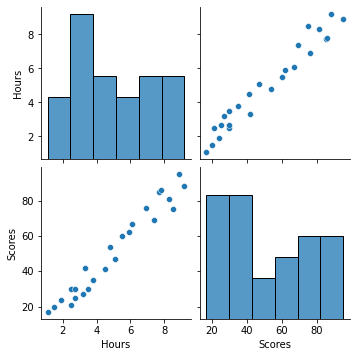

In [ ]:
sns.pairplot(student_data)

By obeserving the above graph we can clearly see that there is positive linear relation between hours of studies and percentage score.

###Training a Linear Regression Model

In [ ]:
X = student_data.iloc[:,:-1].values
y = student_data.iloc[:,1].values

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,X_test.shape)

(20, 1) (5, 1)


In [ ]:
print(y_train.shape, y_test.shape)

(20,) (5,)


### Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

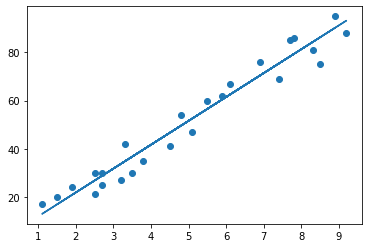

In [ ]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions from our Model

In [ ]:
y_pred = lm.predict(X_test)

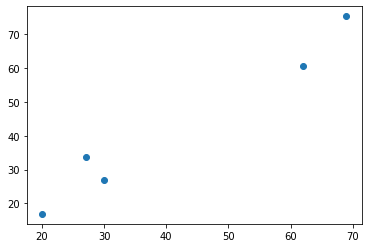

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
# Comparing Actual vs Predicted
student_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
student_data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting with custom inpute

In [ ]:
hours = [[9.25]]
predict = lm.predict(hours)
print(predict)

[93.69173249]


From above result we can say that if student studied for 9.25 hours then he or she might score 93.69%.


### Ealuating the model

In [ ]:
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


### Outcome 
To get marks above 90 student have to study 8-9 hours daily.